In [1]:
# Enter your rapidapi key here:
RAPIDAPIKEY = '3ee19aa166msh3261b83509f104dp118820jsn77f7b75db061'    # <-- FIXME.  Enter your key here.

In [2]:
# We'll need these libraries to help us import and manage the data:
import http.client
import json
import pandas as pd
import numpy as np

In [3]:
# In this cell we'll establish a connection for this particular API:
conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': RAPIDAPIKEY
    }

In [4]:
# Now, we'll use the "countries" endpoint to get a list of countries:
conn.request("GET", "/countries", headers=headers)

resp  = conn.getresponse()
data = resp.read().decode("utf-8")

# `data` is a string, in the JSON (JavaScript Object Notation) format
print(type(data))
print(data)
# Note how `data` looks like a dictionary (but it's a string)

# Let's create a dictionary from this JSON data:
countries = json.loads(data)

<class 'str'>
{"api":{"results":167,"countries":{"1":"Albania","2":"Algeria","3":"Andorra","4":"Angola","5":"Argentina","6":"Armenia","7":"Aruba","8":"Australia","9":"Austria","10":"Azerbaidjan","11":"Bahrain","12":"Bangladesh","13":"Barbados","14":"Belarus","15":"Belgium","16":"Belize","17":"Benin","18":"Bermuda","19":"Bhutan","20":"Bolivia","21":"Bosnia","22":"Botswana","23":"Brazil","24":"Bulgaria","25":"Burkina-Faso","26":"Burundi","27":"Cambodia","28":"Cameroon","29":"Canada","30":"Chile","31":"China","32":"Chinese-Taipei","33":"Colombia","34":"Congo","35":"Congo-DR","36":"Costa-Rica","37":"Crimea","38":"Croatia","39":"Cuba","40":"Curacao","41":"Cyprus","42":"Czech-Republic","43":"Denmark","44":"Dominican-Republic","45":"Ecuador","46":"Egypt","47":"El-Salvador","48":"England","49":"Estonia","50":"Eswatini","51":"Ethiopia","52":"Faroe-Islands","53":"Fiji","54":"Finland","55":"France","56":"Gabon","57":"Gambia","58":"Georgia","59":"Germany","60":"Ghana","61":"Gibraltar","62":"Greece

# Extracting UEFA Champions League id and seasons from Leagues data

In [5]:
# Now, we'll use the "countries" endpoint to get a list of countries:

conn.request("GET", "/v3/leagues", headers=headers)
resp  = conn.getresponse()
data = resp.read().decode("utf-8")

# `data` is a string, in the JSON (JavaScript Object Notation) format
print(type(data))
print(data)
# Note how `data` looks like a dictionary (but it's a string)

# Let's create a dictionary from this JSON data:
leagues = json.loads(data)

<class 'str'>
{"get":"leagues","parameters":[],"errors":[],"results":1000,"paging":{"current":1,"total":1},"response":[{"league":{"id":4,"name":"Euro Championship","type":"Cup","logo":"https:\/\/media-1.api-sports.io\/football\/leagues\/4.png"},"country":{"name":"World","code":null,"flag":null},"seasons":[{"year":2008,"start":"2008-06-07","end":"2008-06-29","current":false,"coverage":{"fixtures":{"events":true,"lineups":true,"statistics_fixtures":false,"statistics_players":false},"standings":false,"players":false,"top_scorers":false,"top_assists":false,"top_cards":false,"injuries":false,"predictions":true,"odds":false}},{"year":2012,"start":"2012-06-08","end":"2012-07-01","current":false,"coverage":{"fixtures":{"events":true,"lineups":true,"statistics_fixtures":false,"statistics_players":false},"standings":false,"players":false,"top_scorers":false,"top_assists":false,"top_cards":false,"injuries":false,"predictions":true,"odds":false}},{"year":2016,"start":"2016-06-10","end":"2016-07-10

In [6]:
leagues.keys()

dict_keys(['get', 'parameters', 'errors', 'results', 'paging', 'response'])

In [7]:
leagues['response']

[{'league': {'id': 4,
   'name': 'Euro Championship',
   'type': 'Cup',
   'logo': 'https://media-1.api-sports.io/football/leagues/4.png'},
  'country': {'name': 'World', 'code': None, 'flag': None},
  'seasons': [{'year': 2008,
    'start': '2008-06-07',
    'end': '2008-06-29',
    'current': False,
    'coverage': {'fixtures': {'events': True,
      'lineups': True,
      'statistics_fixtures': False,
      'statistics_players': False},
     'standings': False,
     'players': False,
     'top_scorers': False,
     'top_assists': False,
     'top_cards': False,
     'injuries': False,
     'predictions': True,
     'odds': False}},
   {'year': 2012,
    'start': '2012-06-08',
    'end': '2012-07-01',
    'current': False,
    'coverage': {'fixtures': {'events': True,
      'lineups': True,
      'statistics_fixtures': False,
      'statistics_players': False},
     'standings': False,
     'players': False,
     'top_scorers': False,
     'top_assists': False,
     'top_cards': Fals

In [8]:
data = leagues['response']
df_data = []
for d in data:
    league_name = d['league']['name']
    league_id = d['league']['id']
    seasons = d['seasons']
    for season in seasons:
        year = season['year']
        df_data.append({'name': league_name, 'id': league_id, 'year': year})

# Creating a dataframe
df = pd.DataFrame(df_data)
# df.head(25)

df[df['name'] == 'UEFA Champions League']


name  id  year
175  UEFA Champions League   2  2011
176  UEFA Champions League   2  2012
177  UEFA Champions League   2  2013
178  UEFA Champions League   2  2014
179  UEFA Champions League   2  2015
180  UEFA Champions League   2  2016
181  UEFA Champions League   2  2017
182  UEFA Champions League   2  2018
183  UEFA Champions League   2  2019
184  UEFA Champions League   2  2020
185  UEFA Champions League   2  2021
186  UEFA Champions League   2  2022

# Get fixture details for UEFA 2020

In [9]:
# Now, we'll use the "countries" endpoint to get a list of countries:

conn.request("GET", "/v3/fixtures?league=2&season=2020", headers=headers)
resp  = conn.getresponse()
data = resp.read().decode("utf-8")

# `data` is a string, in the JSON (JavaScript Object Notation) format
print(type(data))
print(data)
# Note how `data` looks like a dictionary (but it's a string)

# Let's create a dictionary from this JSON data:
fixtures_lea = json.loads(data)

<class 'str'>
{"get":"fixtures","parameters":{"league":"2","season":"2020"},"errors":[],"results":178,"paging":{"current":1,"total":1},"response":[{"fixture":{"id":590762,"referee":"Luis Godinho","timezone":"UTC","date":"2020-08-26T14:30:00+00:00","timestamp":1598452200,"periods":{"first":1598452200,"second":1598455800},"venue":{"id":1119,"name":"AFAS Stadion","city":"Alkmaar"},"status":{"long":"Match Finished","short":"AET","elapsed":120}},"league":{"id":2,"name":"UEFA Champions League","country":"World","logo":"https:\/\/media-3.api-sports.io\/football\/leagues\/2.png","flag":null,"season":2020,"round":"2nd Qualifying Round"},"teams":{"home":{"id":201,"name":"AZ Alkmaar","logo":"https:\/\/media-2.api-sports.io\/football\/teams\/201.png","winner":true},"away":{"id":567,"name":"Plzen","logo":"https:\/\/media-2.api-sports.io\/football\/teams\/567.png","winner":false}},"goals":{"home":3,"away":1},"score":{"halftime":{"home":0,"away":0},"fulltime":{"home":1,"away":1},"extratime":{"home":2

In [10]:
fixtures_lea.keys()

dict_keys(['get', 'parameters', 'errors', 'results', 'paging', 'response'])

In [11]:
fixtures_lea['response']

[{'fixture': {'id': 590762,
   'referee': 'Luis Godinho',
   'timezone': 'UTC',
   'date': '2020-08-26T14:30:00+00:00',
   'timestamp': 1598452200,
   'periods': {'first': 1598452200, 'second': 1598455800},
   'venue': {'id': 1119, 'name': 'AFAS Stadion', 'city': 'Alkmaar'},
   'status': {'long': 'Match Finished', 'short': 'AET', 'elapsed': 120}},
  'league': {'id': 2,
   'name': 'UEFA Champions League',
   'country': 'World',
   'logo': 'https://media-3.api-sports.io/football/leagues/2.png',
   'flag': None,
   'season': 2020,
   'round': '2nd Qualifying Round'},
  'teams': {'home': {'id': 201,
    'name': 'AZ Alkmaar',
    'logo': 'https://media-2.api-sports.io/football/teams/201.png',
    'winner': True},
   'away': {'id': 567,
    'name': 'Plzen',
    'logo': 'https://media-2.api-sports.io/football/teams/567.png',
    'winner': False}},
  'goals': {'home': 3, 'away': 1},
  'score': {'halftime': {'home': 0, 'away': 0},
   'fulltime': {'home': 1, 'away': 1},
   'extratime': {'home': 

In [12]:
fixture_lea_df = pd.DataFrame(fixtures_lea['response'])
df = fixture_lea_df
# extract the required columns
df = df[['fixture', 'league', 'teams']]
df['date'] = df['fixture'].apply(lambda x: x['date'])
df['city'] = df['fixture'].apply(lambda x: x['venue']['city'])
df['timezone'] = df['fixture'].apply(lambda x: x['timezone'])
df['league_name'] = df['league'].apply(lambda x: x['name'])
df['home_team'] = df['teams'].apply(lambda x: x['home']['name'])
df['home_id'] = df['teams'].apply(lambda x: x['home']['id'])
df['away_team'] = df['teams'].apply(lambda x: x['away']['name'])
df['away_id'] = df['teams'].apply(lambda x: x['away']['id'])
df


C:\Users\krish\AppData\Local\Temp\ipykernel_30984\98209105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['fixture'].apply(lambda x: x['date'])


fixture  \
0    {'id': 590762, 'referee': 'Luis Godinho', 'tim...   
1    {'id': 590763, 'referee': 'D. Doveri', 'timezo...   
2    {'id': 590764, 'referee': 'Juan Martínez', 'ti...   
3    {'id': 590765, 'referee': 'Y. Kozyk', 'timezon...   
4    {'id': 590766, 'referee': 'N. Laforge', 'timez...   
..                                                 ...   
173  {'id': 698179, 'referee': 'D. Makkelie', 'time...   
174  {'id': 698180, 'referee': 'D. Orsato', 'timezo...   
175  {'id': 698181, 'referee': 'F. Brych', 'timezon...   
176  {'id': 698182, 'referee': 'B. Kuipers', 'timez...   
177  {'id': 701961, 'referee': 'Antonio Mateu', 'ti...   

                                                league  \
0    {'id': 2, 'name': 'UEFA Champions League', 'co...   
1    {'id': 2, 'name': 'UEFA Champions League', 'co...   
2    {'id': 2, 'name': 'UEFA Champions League', 'co...   
3    {'id': 2, 'name': 'UEFA Champions League', 'co...   
4    {'id': 2, 'name': 'UEFA Champions League', 'co...   
..                                                 ...   
173  {'id': 2, 'name': 'UEFA Champions League', 'co...   
174  {'id': 2, 'name': 'UEFA Champions League', 'co...   
175  {'id': 2, 'name': 'UEFA Champions League', 'co...   
176  {'id': 2, 'name': 'UEFA Champions League', 'co...   
177  {'id': 2, 'name': 'UEFA Champions League', 'co...   

                                                 teams  \
0    {'home': {'id': 201, 'name': 'AZ Alkmaar', 'lo...   
1    {'home': {'id': 619, 'name': 'PAOK', 'logo': '...   
2    {'home': {'id': 1017, 'name': 'NK Lokomotiva Z...   
3    {'home': {'id': 556, 'name': 'Qarabag', 'logo'...   
4    {'home': {'id': 339, 'name': 'Legia Warszawa',...   
..                                                 ...   
173  {'home': {'id': 541, 'name': 'Real Madrid', 'l...   
174  {'home': {'id': 49, 'name': 'Chelsea', 'logo':...   
175  {'home': {'id': 85, 'name': 'Paris Saint Germa...   
176  {'home': {'id': 50, 'name': 'Manchester City',...   
177  {'home': {'id': 50, 'name': 'Manchester City',...   

                          date          city timezone            league_name  \
0    2020-08-26T14:30:00+00:00       Alkmaar      UTC  UEFA Champions League   
1    2020-08-25T18:00:00+00:00  Thessaloníki      UTC  UEFA Champions League   
2    2020-08-26T17:00:00+00:00        Zagreb      UTC  UEFA Champions League   
3    2020-08-18T16:00:00+00:00          Baku      UTC  UEFA Champions League   
4    2020-08-18T17:00:00+00:00      Warszawa      UTC  UEFA Champions League   
..                         ...           ...      ...                    ...   
173  2021-04-27T19:00:00+00:00        Madrid      UTC  UEFA Champions League   
174  2021-05-05T19:00:00+00:00        London      UTC  UEFA Champions League   
175  2021-04-28T19:00:00+00:00         Paris      UTC  UEFA Champions League   
176  2021-05-04T19:00:00+00:00    Manchester      UTC  UEFA Champions League   
177  2021-05-29T19:00:00+00:00         Porto      UTC  UEFA Champions League   

                home_team  home_id            away_team  away_id  
0              AZ Alkmaar      201                Plzen      567  
1                    PAOK      619             Besiktas      549  
2    NK Lokomotiva Zagreb     1017         Rapid Vienna      781  
3                 Qarabag      556               Sileks     4331  
4          Legia Warszawa      339             Linfield      583  
..                    ...      ...                  ...      ...  
173           Real Madrid      541              Chelsea       49  
174               Chelsea       49          Real Madrid      541  
175   Paris Saint Germain       85      Manchester City       50  
176       Manchester City       50  Paris Saint Germain       85  
177       Manchester City       50              Chelsea       49  

[178 rows x 11 columns]

In [13]:

from datetime import datetime

df['date_time'] = pd.to_datetime(df['date'])
df['date_time'] = df['date_time'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

print(df['date_time'])


0      2020-08-26 14:30:00
1      2020-08-25 18:00:00
2      2020-08-26 17:00:00
3      2020-08-18 16:00:00
4      2020-08-18 17:00:00
              ...         
173    2021-04-27 19:00:00
174    2021-05-05 19:00:00
175    2021-04-28 19:00:00
176    2021-05-04 19:00:00
177    2021-05-29 19:00:00
Name: date_time, Length: 178, dtype: object


In [14]:
df = df.sort_values('date_time', ascending=True)
df



fixture  \
20   {'id': 590782, 'referee': 'B. Berke', 'timezon...   
22   {'id': 590784, 'referee': 'R. Jenkins', 'timez...   
21   {'id': 590783, 'referee': None, 'timezone': 'U...   
3    {'id': 590765, 'referee': 'Y. Kozyk', 'timezon...   
4    {'id': 590766, 'referee': 'N. Laforge', 'timez...   
..                                                 ...   
173  {'id': 698179, 'referee': 'D. Makkelie', 'time...   
175  {'id': 698181, 'referee': 'F. Brych', 'timezon...   
176  {'id': 698182, 'referee': 'B. Kuipers', 'timez...   
174  {'id': 698180, 'referee': 'D. Orsato', 'timezo...   
177  {'id': 701961, 'referee': 'Antonio Mateu', 'ti...   

                                                league  \
20   {'id': 2, 'name': 'UEFA Champions League', 'co...   
22   {'id': 2, 'name': 'UEFA Champions League', 'co...   
21   {'id': 2, 'name': 'UEFA Champions League', 'co...   
3    {'id': 2, 'name': 'UEFA Champions League', 'co...   
4    {'id': 2, 'name': 'UEFA Champions League', 'co...   
..                                                 ...   
173  {'id': 2, 'name': 'UEFA Champions League', 'co...   
175  {'id': 2, 'name': 'UEFA Champions League', 'co...   
176  {'id': 2, 'name': 'UEFA Champions League', 'co...   
174  {'id': 2, 'name': 'UEFA Champions League', 'co...   
177  {'id': 2, 'name': 'UEFA Champions League', 'co...   

                                                 teams  \
20   {'home': {'id': 2260, 'name': 'Tre Fiori', 'lo...   
22   {'home': {'id': 14281, 'name': 'Drita', 'logo'...   
21   {'home': {'id': 14281, 'name': 'Drita', 'logo'...   
3    {'home': {'id': 556, 'name': 'Qarabag', 'logo'...   
4    {'home': {'id': 339, 'name': 'Legia Warszawa',...   
..                                                 ...   
173  {'home': {'id': 541, 'name': 'Real Madrid', 'l...   
175  {'home': {'id': 85, 'name': 'Paris Saint Germa...   
176  {'home': {'id': 50, 'name': 'Manchester City',...   
174  {'home': {'id': 49, 'name': 'Chelsea', 'logo':...   
177  {'home': {'id': 50, 'name': 'Manchester City',...   

                          date        city timezone            league_name  \
20   2020-08-08T13:00:00+00:00        Nyon      UTC  UEFA Champions League   
22   2020-08-08T17:30:00+00:00        Nyon      UTC  UEFA Champions League   
21   2020-08-11T16:00:00+00:00        Nyon      UTC  UEFA Champions League   
3    2020-08-18T16:00:00+00:00        Baku      UTC  UEFA Champions League   
4    2020-08-18T17:00:00+00:00    Warszawa      UTC  UEFA Champions League   
..                         ...         ...      ...                    ...   
173  2021-04-27T19:00:00+00:00      Madrid      UTC  UEFA Champions League   
175  2021-04-28T19:00:00+00:00       Paris      UTC  UEFA Champions League   
176  2021-05-04T19:00:00+00:00  Manchester      UTC  UEFA Champions League   
174  2021-05-05T19:00:00+00:00      London      UTC  UEFA Champions League   
177  2021-05-29T19:00:00+00:00       Porto      UTC  UEFA Champions League   

               home_team  home_id              away_team  away_id  \
20             Tre Fiori     2260               Linfield      583   
22                 Drita    14281  Inter Club d'Escaldes     3342   
21                 Drita    14281               Linfield      583   
3                Qarabag      556                 Sileks     4331   
4         Legia Warszawa      339               Linfield      583   
..                   ...      ...                    ...      ...   
173          Real Madrid      541                Chelsea       49   
175  Paris Saint Germain       85        Manchester City       50   
176      Manchester City       50    Paris Saint Germain       85   
174              Chelsea       49            Real Madrid      541   
177      Manchester City       50                Chelsea       49   

               date_time  
20   2020-08-08 13:00:00  
22   2020-08-08 17:30:00  
21   2020-08-11 16:00:00  
3    2020-08-18 16:00:00  
4    2020-08-18 17:00:00  
..                   ...  
1

In [15]:
#Since we do not have the data of home and away teams' city and their countries in the previous data,
#we are calling another API to get these details

# Addition of city and country columns

In [16]:
# Now, we'll use the "countries" endpoint to get a list of countries:

conn.request("GET", "/v3/teams?league=2&season=2020", headers=headers)
resp  = conn.getresponse()
data = resp.read().decode("utf-8")

# `data` is a string, in the JSON (JavaScript Object Notation) format
print(type(data))
print(data)
# Note how `data` looks like a dictionary (but it's a string)

# Let's create a dictionary from this JSON data:
team_countries = json.loads(data)

<class 'str'>
{"get":"teams","parameters":{"league":"2","season":"2020"},"errors":[],"results":79,"paging":{"current":1,"total":1},"response":[{"team":{"id":33,"name":"Manchester United","code":"MUN","country":"England","founded":1878,"national":false,"logo":"https:\/\/media-1.api-sports.io\/football\/teams\/33.png"},"venue":{"id":556,"name":"Old Trafford","address":"Sir Matt Busby Way","city":"Manchester","capacity":76212,"surface":"grass","image":"https:\/\/media-3.api-sports.io\/football\/venues\/556.png"}},{"team":{"id":40,"name":"Liverpool","code":"LIV","country":"England","founded":1892,"national":false,"logo":"https:\/\/media-2.api-sports.io\/football\/teams\/40.png"},"venue":{"id":550,"name":"Anfield","address":"Anfield Road","city":"Liverpool","capacity":55212,"surface":"grass","image":"https:\/\/media-2.api-sports.io\/football\/venues\/550.png"}},{"team":{"id":49,"name":"Chelsea","code":"CHE","country":"England","founded":1905,"national":false,"logo":"https:\/\/media-3.api-sp

In [17]:
team_countries.keys()

dict_keys(['get', 'parameters', 'errors', 'results', 'paging', 'response'])

In [18]:
team_countries['response']

[{'team': {'id': 33,
   'name': 'Manchester United',
   'code': 'MUN',
   'country': 'England',
   'founded': 1878,
   'national': False,
   'logo': 'https://media-1.api-sports.io/football/teams/33.png'},
  'venue': {'id': 556,
   'name': 'Old Trafford',
   'address': 'Sir Matt Busby Way',
   'city': 'Manchester',
   'capacity': 76212,
   'surface': 'grass',
   'image': 'https://media-3.api-sports.io/football/venues/556.png'}},
 {'team': {'id': 40,
   'name': 'Liverpool',
   'code': 'LIV',
   'country': 'England',
   'founded': 1892,
   'national': False,
   'logo': 'https://media-2.api-sports.io/football/teams/40.png'},
  'venue': {'id': 550,
   'name': 'Anfield',
   'address': 'Anfield Road',
   'city': 'Liverpool',
   'capacity': 55212,
   'surface': 'grass',
   'image': 'https://media-2.api-sports.io/football/venues/550.png'}},
 {'team': {'id': 49,
   'name': 'Chelsea',
   'code': 'CHE',
   'country': 'England',
   'founded': 1905,
   'national': False,
   'logo': 'https://media-3.

In [19]:

### form a dataframe from teams and their countries api with team names changed to away_team_name, country and city accordingly
team_count_df = pd.DataFrame(team_countries['response'])
df2 = team_count_df
df2


# extract the required columns
df2 = df2[[ 'venue', 'team']]
df2['away_id2'] = df2['team'].apply(lambda x: x['id'])
df2['away_team_name'] = df2['team'].apply(lambda x: x['name'])
df2['away_team_country'] = df2['team'].apply(lambda x: x['country'])
df2['away_team_city'] = df2['venue'].apply(lambda x: x['city'])
df2['capacity'] = df2['venue'].apply(lambda x: x['capacity'])

df2
##Change the name to df_away

C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1543277663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['away_id2'] = df2['team'].apply(lambda x: x['id'])
C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1543277663.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['away_team_name'] = df2['team'].apply(lambda x: x['name'])
C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1543277663.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

venue  \
0   {'id': 556, 'name': 'Old Trafford', 'address':...   
1   {'id': 550, 'name': 'Anfield', 'address': 'Anf...   
2   {'id': 519, 'name': 'Stamford Bridge', 'addres...   
3   {'id': 555, 'name': 'Etihad Stadium', 'address...   
4   {'id': 12678, 'name': 'Stade Orange Vélodrome'...   
..                                                ...   
74  {'id': 3332, 'name': 'Stadion Z'dežele', 'addr...   
75  {'id': 11541, 'name': 'Independence Ground', '...   
76  {'id': 2611, 'name': 'Stadions Skonto', 'addre...   
77  {'id': 760, 'name': 'Victoria Stadium', 'addre...   
78  {'id': 8128, 'name': 'Stadiumi i qytetit Gjila...   

                                                 team  away_id2  \
0   {'id': 33, 'name': 'Manchester United', 'code'...        33   
1   {'id': 40, 'name': 'Liverpool', 'code': 'LIV',...        40   
2   {'id': 49, 'name': 'Chelsea', 'code': 'CHE', '...        49   
3   {'id': 50, 'name': 'Manchester City', 'code': ...        50   
4   {'id': 81, 'name': 'Marseille', 'code': 'MAR',...        81   
..                                                ...       ...   
74  {'id': 4360, 'name': 'Celje', 'code': 'CEL', '...      4360   
75  {'id': 4625, 'name': 'Floriana', 'code': 'FLO'...      4625   
76  {'id': 10124, 'name': 'Riga', 'code': None, 'c...     10124   
77  {'id': 10125, 'name': 'Europa', 'code': None, ...     10125   
78  {'id': 14281, 'name': 'Drita', 'code': None, '...     14281   

       away_team_name away_team_country away_team_city  capacity  
0   Manchester United           England     Manchester     76212  
1           Liverpool           England      Liverpool     55212  
2             Chelsea           England         London     41841  
3     Manchester City           England     Manchester     55097  
4           Marseille            France      Marseille     67394  
..                ...               ...            ...       ...  
74              Celje          Slovenia          Celje     13059  
75           Floriana             Malta       Floriana      3000  
76               Riga            Latvia           Riga      8207  
77             Europa         Gibraltar      Gibraltar      5000  
78              Drita            Kosovo       Gnjilane     15000  

[79 rows x 7 columns]

In [20]:
merged_df = pd.merge(df, df2, how='left', left_on='away_id', right_on='away_id2')

# Select only the required columns
result_df = merged_df.loc[:, ['city', 'timezone', 'league_name', 'home_team', 'home_id', 'away_team', 'away_id', 'away_team_country', 'away_team_city', 'capacity','date_time']]
result_df

city timezone            league_name            home_team  home_id  \
0          Nyon      UTC  UEFA Champions League            Tre Fiori     2260   
1          Nyon      UTC  UEFA Champions League                Drita    14281   
2          Nyon      UTC  UEFA Champions League                Drita    14281   
3          Baku      UTC  UEFA Champions League              Qarabag      556   
4      Warszawa      UTC  UEFA Champions League       Legia Warszawa      339   
..          ...      ...                    ...                  ...      ...   
173      Madrid      UTC  UEFA Champions League          Real Madrid      541   
174       Paris      UTC  UEFA Champions League  Paris Saint Germain       85   
175  Manchester      UTC  UEFA Champions League      Manchester City       50   
176      London      UTC  UEFA Champions League              Chelsea       49   
177       Porto      UTC  UEFA Champions League      Manchester City       50   

                 away_team  away_id away_team_country away_team_city  \
0                 Linfield      583  Northern-Ireland        Belfast   
1    Inter Club d'Escaldes     3342           Andorra   Santa Coloma   
2                 Linfield      583  Northern-Ireland        Belfast   
3                   Sileks     4331         Macedonia        Kratovo   
4                 Linfield      583  Northern-Ireland        Belfast   
..                     ...      ...               ...            ...   
173                Chelsea       49           England         London   
174        Manchester City       50           England     Manchester   
175    Paris Saint Germain       85            France          Paris   
176            Real Madrid      541             Spain         Madrid   
177                Chelsea       49           England         London   

     capacity            date_time  
0       18614  2020-08-08 13:00:00  
1        2000  2020-08-08 17:30:00  
2       18614  2020-08-11 16:00:00  
3        3000  2020-08-18 16:00:00  
4       18614  2020-08-18 17:00:00  
..        ...                  ...  
173     41841  2021-04-27 19:00:00  
174     55097  2021-04-28 19:00:00  
175     47929  2021-05-04 19:00:00  
176     85454  2021-05-05 19:00:00  
177     41841  2021-05-29 19:00:00  

[178 rows x 11 columns]

In [21]:
### form a dataframe from teams and their countries api with team names changed to home_team_name, country and city accordingly
team_count_df = pd.DataFrame(team_countries['response'])
df3 = team_count_df
df3
# extract the required columns
df3 = df3[[ 'venue', 'team']]
df3['home_id2'] = df3['team'].apply(lambda x: x['id'])
df3['home_team_name'] = df3['team'].apply(lambda x: x['name'])
df3['home_team_country'] = df3['team'].apply(lambda x: x['country'])
df3['home_team_city'] = df3['venue'].apply(lambda x: x['city'])
df3['home_capacity'] = df3['venue'].apply(lambda x: x['capacity'])

df3
###Change the name to df_home

C:\Users\krish\AppData\Local\Temp\ipykernel_30984\925310882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['home_id2'] = df3['team'].apply(lambda x: x['id'])
C:\Users\krish\AppData\Local\Temp\ipykernel_30984\925310882.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['home_team_name'] = df3['team'].apply(lambda x: x['name'])
C:\Users\krish\AppData\Local\Temp\ipykernel_30984\925310882.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

venue  \
0   {'id': 556, 'name': 'Old Trafford', 'address':...   
1   {'id': 550, 'name': 'Anfield', 'address': 'Anf...   
2   {'id': 519, 'name': 'Stamford Bridge', 'addres...   
3   {'id': 555, 'name': 'Etihad Stadium', 'address...   
4   {'id': 12678, 'name': 'Stade Orange Vélodrome'...   
..                                                ...   
74  {'id': 3332, 'name': 'Stadion Z'dežele', 'addr...   
75  {'id': 11541, 'name': 'Independence Ground', '...   
76  {'id': 2611, 'name': 'Stadions Skonto', 'addre...   
77  {'id': 760, 'name': 'Victoria Stadium', 'addre...   
78  {'id': 8128, 'name': 'Stadiumi i qytetit Gjila...   

                                                 team  home_id2  \
0   {'id': 33, 'name': 'Manchester United', 'code'...        33   
1   {'id': 40, 'name': 'Liverpool', 'code': 'LIV',...        40   
2   {'id': 49, 'name': 'Chelsea', 'code': 'CHE', '...        49   
3   {'id': 50, 'name': 'Manchester City', 'code': ...        50   
4   {'id': 81, 'name': 'Marseille', 'code': 'MAR',...        81   
..                                                ...       ...   
74  {'id': 4360, 'name': 'Celje', 'code': 'CEL', '...      4360   
75  {'id': 4625, 'name': 'Floriana', 'code': 'FLO'...      4625   
76  {'id': 10124, 'name': 'Riga', 'code': None, 'c...     10124   
77  {'id': 10125, 'name': 'Europa', 'code': None, ...     10125   
78  {'id': 14281, 'name': 'Drita', 'code': None, '...     14281   

       home_team_name home_team_country home_team_city  home_capacity  
0   Manchester United           England     Manchester          76212  
1           Liverpool           England      Liverpool          55212  
2             Chelsea           England         London          41841  
3     Manchester City           England     Manchester          55097  
4           Marseille            France      Marseille          67394  
..                ...               ...            ...            ...  
74              Celje          Slovenia          Celje          13059  
75           Floriana             Malta       Floriana           3000  
76               Riga            Latvia           Riga           8207  
77             Europa         Gibraltar      Gibraltar           5000  
78              Drita            Kosovo       Gnjilane          15000  

[79 rows x 7 columns]

In [22]:
merged_df_2 = pd.merge(result_df, df3, how='left', left_on='home_id', right_on='home_id2')
merged_df_2
# Select only the required columns
result_df_2= merged_df_2.loc[:, ['city', 'timezone', 'date_time','league_name', 'home_team','home_team_name','home_id','home_team_city','home_team_country', 'home_capacity','away_team', 'away_id','away_team_city', 'away_team_country']]
result_df_2

city timezone            date_time            league_name  \
0          Nyon      UTC  2020-08-08 13:00:00  UEFA Champions League   
1          Nyon      UTC  2020-08-08 17:30:00  UEFA Champions League   
2          Nyon      UTC  2020-08-11 16:00:00  UEFA Champions League   
3          Baku      UTC  2020-08-18 16:00:00  UEFA Champions League   
4      Warszawa      UTC  2020-08-18 17:00:00  UEFA Champions League   
..          ...      ...                  ...                    ...   
173      Madrid      UTC  2021-04-27 19:00:00  UEFA Champions League   
174       Paris      UTC  2021-04-28 19:00:00  UEFA Champions League   
175  Manchester      UTC  2021-05-04 19:00:00  UEFA Champions League   
176      London      UTC  2021-05-05 19:00:00  UEFA Champions League   
177       Porto      UTC  2021-05-29 19:00:00  UEFA Champions League   

               home_team       home_team_name  home_id home_team_city  \
0              Tre Fiori            Tre Fiori     2260     Fiorentino   
1                  Drita                Drita    14281       Gnjilane   
2                  Drita                Drita    14281       Gnjilane   
3                Qarabag              Qarabag      556           Baku   
4         Legia Warszawa       Legia Warszawa      339       Warszawa   
..                   ...                  ...      ...            ...   
173          Real Madrid          Real Madrid      541         Madrid   
174  Paris Saint Germain  Paris Saint Germain       85          Paris   
175      Manchester City      Manchester City       50     Manchester   
176              Chelsea              Chelsea       49         London   
177      Manchester City      Manchester City       50     Manchester   

    home_team_country  home_capacity              away_team  away_id  \
0          San-Marino            700               Linfield      583   
1              Kosovo          15000  Inter Club d'Escaldes     3342   
2              Kosovo          15000               Linfield      583   
3         Azerbaidjan          31850                 Sileks     4331   
4              Poland          31103               Linfield      583   
..                ...            ...                    ...      ...   
173             Spain          85454                Chelsea       49   
174            France          47929        Manchester City       50   
175           England          55097    Paris Saint Germain       85   
176           England          41841            Real Madrid      541   
177           England          55097                Chelsea       49   

    away_team_city away_team_country  
0          Belfast  Northern-Ireland  
1     Santa Coloma           Andorra  
2          Belfast  Northern-Ireland  
3          Kratovo         Macedonia  
4          Belfast  Northern-Ireland  
..             ...               ...  
173         London           England  
174     Manchester           England  
175          Paris            France  
176         Madrid             Spain  
177         London           England  

[178 rows x 14 columns]

In [23]:
#### Taking only the situation where home team city is same as city where the match was held
final_df = result_df_2[result_df_2['home_team_city'] ==result_df_2['city']]
final_df

city timezone            date_time            league_name  \
3          Baku      UTC  2020-08-18 16:00:00  UEFA Champions League   
4      Warszawa      UTC  2020-08-18 17:00:00  UEFA Champions League   
5         Brest      UTC  2020-08-18 18:00:00  UEFA Champions League   
6       Glasgow      UTC  2020-08-18 18:45:00  UEFA Champions League   
7       Beograd      UTC  2020-08-18 19:00:00  UEFA Champions League   
..          ...      ...                  ...                    ...   
172   Liverpool      UTC  2021-04-14 19:00:00  UEFA Champions League   
173      Madrid      UTC  2021-04-27 19:00:00  UEFA Champions League   
174       Paris      UTC  2021-04-28 19:00:00  UEFA Champions League   
175  Manchester      UTC  2021-05-04 19:00:00  UEFA Champions League   
176      London      UTC  2021-05-05 19:00:00  UEFA Champions League   

               home_team       home_team_name  home_id home_team_city  \
3                Qarabag              Qarabag      556           Baku   
4         Legia Warszawa       Legia Warszawa      339       Warszawa   
5           Dinamo Brest         Dinamo Brest      386          Brest   
6                 Celtic               Celtic      247        Glasgow   
7       FK Crvena Zvezda     FK Crvena Zvezda      598        Beograd   
..                   ...                  ...      ...            ...   
172            Liverpool            Liverpool       40      Liverpool   
173          Real Madrid          Real Madrid      541         Madrid   
174  Paris Saint Germain  Paris Saint Germain       85          Paris   
175      Manchester City      Manchester City       50     Manchester   
176              Chelsea              Chelsea       49         London   

    home_team_country  home_capacity            away_team  away_id  \
3         Azerbaidjan          31850               Sileks     4331   
4              Poland          31103             Linfield      583   
5             Belarus          10169            FC Astana      562   
6            Scotland          60832         KR Reykjavik      271   
7              Serbia          51862               Europa    10125   
..                ...            ...                  ...      ...   
172           England          55212          Real Madrid      541   
173             Spain          85454              Chelsea       49   
174            France          47929      Manchester City       50   
175           England          55097  Paris Saint Germain       85   
176           England          41841          Real Madrid      541   

    away_team_city away_team_country  
3          Kratovo         Macedonia  
4          Belfast  Northern-Ireland  
5       Nur-Sultan        Kazakhstan  
6        Reykjavík           Iceland  
7        Gibraltar         Gibraltar  
..             ...               ...  
172         Madrid             Spain  
173         London           England  
174     Manchester           England  
175          Paris            France  
176         Madrid             Spain  

[163 rows x 14 columns]

# Flight Data 

# Airport location and Size data

In [24]:

# In this cell we'll establish a connection for this particular API:
conn = http.client.HTTPSConnection("flight-radar1.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "3ee19aa166msh3261b83509f104dp118820jsn77f7b75db061",
    'X-RapidAPI-Host': "flight-radar1.p.rapidapi.com"
}

In [25]:
# Now, we'll use the "countries" endpoint to get a list of countries:
conn.request("GET", "/airports/list", headers=headers)

resp  = conn.getresponse()
data = resp.read().decode("utf-8")

# `data` is a string, in the JSON (JavaScript Object Notation) format
print(type(data))
print(data)
# Note how `data` looks like a dictionary (but it's a string)

# Let's create a dictionary from this JSON data:
airports = json.loads(data)

<class 'str'>
{"version":"1683712965","rows":[{"id":1900,"name":"A Coruna Airport","iata":"LCG","icao":"LECO","city":"A Coruna","lat":43.302059,"lon":-8.37725,"country":"Spain","alt":326,"size":37201,"timezone":{"name":"Europe\/Madrid","offset":7200,"offsetHours":"2:00","abbr":"CEST","abbrName":"Central European Summer Time","isDst":true},"countryId":209},{"id":3,"name":"Aachen Merzbruck Airport","iata":"AAH","icao":"EDKA","city":"Aachen","lat":50.823051,"lon":6.186111,"country":"Germany","alt":623,"size":14795,"timezone":{"name":"Europe\/Berlin","offset":7200,"offsetHours":"2:00","abbr":"CEST","abbrName":"Central European Summer Time","isDst":true},"countryId":83},{"id":4,"name":"Aalborg Airport","iata":"AAL","icao":"EKYT","city":"Aalborg","lat":57.092781,"lon":9.849164,"country":"Denmark","alt":10,"size":82926,"timezone":{"name":"Europe\/Copenhagen","offset":7200,"offsetHours":"2:00","abbr":"CEST","abbrName":"Central European Summer Time","isDst":true},"countryId":61},{"id":9,"name":

In [26]:
airport_df = pd.DataFrame(airports['rows'])

airport_df

id                      name iata  icao         city        lat  \
0     1900          A Coruna Airport  LCG  LECO     A Coruna  43.302059   
1        3  Aachen Merzbruck Airport  AAH  EDKA       Aachen  50.823051   
2        4           Aalborg Airport  AAL  EKYT      Aalborg  57.092781   
3        9            Aarhus Airport  AAR  EKAH       Aarhus  56.300011   
4     7569        Aarhus Sea Airport  QEA  EKAC       Aarhus  56.151993   
...    ...                       ...  ...   ...          ...        ...   
5089  4241     Zunyi Xinzhou Airport  ZYI  ZUZY        Zunyi  27.811167   
5090  4214            Zurich Airport  ZRH  LSZH       Zurich  47.464722   
5091  3825             Zwara Airport  WAX  HLZW        Zwara  32.933334   
5092  4213       Zweibrucken Airport  ZQW  EDRZ  Zweibrucken  49.209518   
5093  4843          Zyryanka Airport  ZKP  UESU     Zyryanka  65.738335   

             lon      country   alt    size  \
0      -8.377250        Spain   326   37201   
1       6.186111      Germany   623   14795   
2       9.849164      Denmark    10   82926   
3      10.619000      Denmark    82   35754   
4      10.247725      Denmark     1    7529   
...          ...          ...   ...     ...   
5089  107.245972        China  2723    9602   
5090    8.549167  Switzerland  1416  966900   
5091   12.083333        Libya     9     570   
5092    7.400647      Germany  1133    9361   
5093  150.707779       Russia   145     121   

                                               timezone  countryId  
0     {'name': 'Europe/Madrid', 'offset': 7200, 'off...        209  
1     {'name': 'Europe/Berlin', 'offset': 7200, 'off...         83  
2     {'name': 'Europe/Copenhagen', 'offset': 7200, ...         61  
3     {'name': 'Europe/Copenhagen', 'offset': 7200, ...         61  
4     {'name': 'Europe/Copenhagen', 'offset': 7200, ...         61  
...                                                 ...        ...  
5089  {'name': 'Asia/Chongqing', 'offset': 28800, 'o...         46  
5090  {'name': 'Europe/Zurich', 'offset': 7200, 'off...        216  
5091  {'name': 'Africa/Tripoli', 'offset': 7200, 'of...        125  
5092  {'name': 'Europe/Berlin', 'offset': 7200, 'off...         83  
5093  {'name': 'Asia/Magadan', 'offset': 39600, 'off...        182  

[5094 rows x 12 columns]

In [27]:
## Extracting the required columns
airport_df = airport_df.iloc[:, [0,1,2,3,4,5,6,7,9,11]]
airport_df

id                      name iata  icao         city        lat  \
0     1900          A Coruna Airport  LCG  LECO     A Coruna  43.302059   
1        3  Aachen Merzbruck Airport  AAH  EDKA       Aachen  50.823051   
2        4           Aalborg Airport  AAL  EKYT      Aalborg  57.092781   
3        9            Aarhus Airport  AAR  EKAH       Aarhus  56.300011   
4     7569        Aarhus Sea Airport  QEA  EKAC       Aarhus  56.151993   
...    ...                       ...  ...   ...          ...        ...   
5089  4241     Zunyi Xinzhou Airport  ZYI  ZUZY        Zunyi  27.811167   
5090  4214            Zurich Airport  ZRH  LSZH       Zurich  47.464722   
5091  3825             Zwara Airport  WAX  HLZW        Zwara  32.933334   
5092  4213       Zweibrucken Airport  ZQW  EDRZ  Zweibrucken  49.209518   
5093  4843          Zyryanka Airport  ZKP  UESU     Zyryanka  65.738335   

             lon      country    size  countryId  
0      -8.377250        Spain   37201        209  
1       6.186111      Germany   14795         83  
2       9.849164      Denmark   82926         61  
3      10.619000      Denmark   35754         61  
4      10.247725      Denmark    7529         61  
...          ...          ...     ...        ...  
5089  107.245972        China    9602         46  
5090    8.549167  Switzerland  966900        216  
5091   12.083333        Libya     570        125  
5092    7.400647      Germany    9361         83  
5093  150.707779       Russia     121        182  

[5094 rows x 10 columns]

In [28]:
# Find the biggest airport in each country
biggest_airport = airport_df.groupby('country')['size'].idxmax().to_dict()

# Add the new columns to the final_df DataFrame
final_df['iata_h'] = ''
final_df['iata_a'] = ''
final_df['icao_h'] = ''
final_df['icao_a'] = ''
final_df['airport_city_h'] = ''
final_df['airport_city_a'] = ''

# Loop over the rows of the sh DataFrame
for i, row in final_df.iterrows():
    # Check if home_team_city is present in airport_df
    if row['home_team_city'] in airport_df['city'].values:
        airport = airport_df.loc[airport_df['city'] == row['home_team_city']]
        final_df.at[i, 'iata_h'] = airport['iata'].values[0]
        final_df.at[i, 'icao_h'] = airport['icao'].values[0]
        final_df.at[i, 'airport_city_h'] = airport['city'].values[0]
    else:
        # Find the biggest airport in the home_team_country
        country = row['home_team_country']
        if country in biggest_airport:
            airport_index = biggest_airport[country]
            airport = airport_df.loc[airport_index]
            final_df.at[i, 'iata_h'] = airport['iata']
            final_df.at[i, 'icao_h'] = airport['icao']
            final_df.at[i, 'airport_city_h'] = airport['city']

    # Check if away_team_city is present in airport_df
    if row['away_team_city'] in airport_df['city'].values:
        airport = airport_df.loc[airport_df['city'] == row['away_team_city']]
        final_df.at[i, 'iata_a'] = airport['iata'].values[0]
        final_df.at[i, 'icao_a'] = airport['icao'].values[0]
        final_df.at[i, 'airport_city_a'] = airport['city'].values[0]
    else:
        # Find the biggest airport in the away_team_country
        country = row['away_team_country']
        if country in biggest_airport:
            airport_index = biggest_airport[country]
            airport = airport_df.loc[airport_index]
            final_df.at[i, 'iata_a'] = airport['iata']
            final_df.at[i, 'icao_a'] = airport['icao']
            final_df.at[i, 'airport_city_a'] = airport['city']
final_df

C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1525831144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['iata_h'] = ''
C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1525831144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['iata_a'] = ''
C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1525831144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

city timezone            date_time            league_name  \
3          Baku      UTC  2020-08-18 16:00:00  UEFA Champions League   
4      Warszawa      UTC  2020-08-18 17:00:00  UEFA Champions League   
5         Brest      UTC  2020-08-18 18:00:00  UEFA Champions League   
6       Glasgow      UTC  2020-08-18 18:45:00  UEFA Champions League   
7       Beograd      UTC  2020-08-18 19:00:00  UEFA Champions League   
..          ...      ...                  ...                    ...   
172   Liverpool      UTC  2021-04-14 19:00:00  UEFA Champions League   
173      Madrid      UTC  2021-04-27 19:00:00  UEFA Champions League   
174       Paris      UTC  2021-04-28 19:00:00  UEFA Champions League   
175  Manchester      UTC  2021-05-04 19:00:00  UEFA Champions League   
176      London      UTC  2021-05-05 19:00:00  UEFA Champions League   

               home_team       home_team_name  home_id home_team_city  \
3                Qarabag              Qarabag      556           Baku   
4         Legia Warszawa       Legia Warszawa      339       Warszawa   
5           Dinamo Brest         Dinamo Brest      386          Brest   
6                 Celtic               Celtic      247        Glasgow   
7       FK Crvena Zvezda     FK Crvena Zvezda      598        Beograd   
..                   ...                  ...      ...            ...   
172            Liverpool            Liverpool       40      Liverpool   
173          Real Madrid          Real Madrid      541         Madrid   
174  Paris Saint Germain  Paris Saint Germain       85          Paris   
175      Manchester City      Manchester City       50     Manchester   
176              Chelsea              Chelsea       49         London   

    home_team_country  home_capacity            away_team  away_id  \
3         Azerbaidjan          31850               Sileks     4331   
4              Poland          31103             Linfield      583   
5             Belarus          10169            FC Astana      562   
6            Scotland          60832         KR Reykjavik      271   
7              Serbia          51862               Europa    10125   
..                ...            ...                  ...      ...   
172           England          55212          Real Madrid      541   
173             Spain          85454              Chelsea       49   
174            France          47929      Manchester City       50   
175           England          55097  Paris Saint Germain       85   
176           England          41841          Real Madrid      541   

    away_team_city away_team_country iata_h iata_a icao_h icao_a  \
3          Kratovo         Macedonia    GYD          UBBB          
4          Belfast  Northern-Ireland    WAW    BHD   EPWA   EGAC   
5       Nur-Sultan        Kazakhstan    BQT    ALA   UMBB   UAAA   
6        Reykjavík           Iceland    GGW    KEF   KGGW   BIKF   
7        Gibraltar         Gibraltar    BEG    GIB   LYBE   LXGB   
..             ...               ...    ...    ...    ...    ...   
172         Madrid             Spain    LPL    MAD   EGGP   LEMD   
173         London           England    MAD    BQH   LEMD   EGKB   
174     Manchester           England    BVA    MAN   LFOB   EGCC   
175          Paris            France    MAN    BVA   EGCC   LFOB   
176         Madrid             Spain    BQH    MAD   EGKB   LEMD   

    airport_city_h airport_city_a  
3             Baku                 
4           Warsaw        Belfast  
5            Brest         Almaty  
6          Glasgow      Reykjavik  
7         Belgrade      Gibraltar  
..             ...            ...  
172      Liverpool         Madrid  
173         Madrid         London  
174          Paris     Manchester  
175     Manchester          Paris  
176         London         Madrid  

[163 rows x 20 columns]

In [29]:
#adding latitude and lon to final_df
# Check if iata_h is in airport_df and populate lat_h and lon_h
final_df['lat_h'] = final_df['iata_h'].map(airport_df.set_index('iata')['lat'])
final_df['lon_h'] = final_df['iata_h'].map(airport_df.set_index('iata')['lon'])

# Check if iata_a is in airport_df and populate lat_a and lon_a
final_df['lat_a'] = final_df['iata_a'].map(airport_df.set_index('iata')['lat'])
final_df['lon_a'] = final_df['iata_a'].map(airport_df.set_index('iata')['lon'])

# Remove rows with missing iata_h or iata_a values
final_df = final_df.dropna(subset=['iata_h', 'iata_a'])
final_df


C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1971682537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['lat_h'] = final_df['iata_h'].map(airport_df.set_index('iata')['lat'])
C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1971682537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['lon_h'] = final_df['iata_h'].map(airport_df.set_index('iata')['lon'])
C:\Users\krish\AppData\Local\Temp\ipykernel_30984\1971682537.py:7: SettingWithCopyWarning: 
A value is trying to be set on a c

city timezone            date_time            league_name  \
3          Baku      UTC  2020-08-18 16:00:00  UEFA Champions League   
4      Warszawa      UTC  2020-08-18 17:00:00  UEFA Champions League   
5         Brest      UTC  2020-08-18 18:00:00  UEFA Champions League   
6       Glasgow      UTC  2020-08-18 18:45:00  UEFA Champions League   
7       Beograd      UTC  2020-08-18 19:00:00  UEFA Champions League   
..          ...      ...                  ...                    ...   
172   Liverpool      UTC  2021-04-14 19:00:00  UEFA Champions League   
173      Madrid      UTC  2021-04-27 19:00:00  UEFA Champions League   
174       Paris      UTC  2021-04-28 19:00:00  UEFA Champions League   
175  Manchester      UTC  2021-05-04 19:00:00  UEFA Champions League   
176      London      UTC  2021-05-05 19:00:00  UEFA Champions League   

               home_team       home_team_name  home_id home_team_city  \
3                Qarabag              Qarabag      556           Baku   
4         Legia Warszawa       Legia Warszawa      339       Warszawa   
5           Dinamo Brest         Dinamo Brest      386          Brest   
6                 Celtic               Celtic      247        Glasgow   
7       FK Crvena Zvezda     FK Crvena Zvezda      598        Beograd   
..                   ...                  ...      ...            ...   
172            Liverpool            Liverpool       40      Liverpool   
173          Real Madrid          Real Madrid      541         Madrid   
174  Paris Saint Germain  Paris Saint Germain       85          Paris   
175      Manchester City      Manchester City       50     Manchester   
176              Chelsea              Chelsea       49         London   

    home_team_country  home_capacity  ... iata_h  iata_a icao_h icao_a  \
3         Azerbaidjan          31850  ...    GYD           UBBB          
4              Poland          31103  ...    WAW     BHD   EPWA   EGAC   
5             Belarus          10169  ...    BQT     ALA   UMBB   UAAA   
6            Scotland          60832  ...    GGW     KEF   KGGW   BIKF   
7              Serbia          51862  ...    BEG     GIB   LYBE   LXGB   
..                ...            ...  ...    ...     ...    ...    ...   
172           England          55212  ...    LPL     MAD   EGGP   LEMD   
173             Spain          85454  ...    MAD     BQH   LEMD   EGKB   
174            France          47929  ...    BVA     MAN   LFOB   EGCC   
175           England          55097  ...    MAN     BVA   EGCC   LFOB   
176           England          41841  ...    BQH     MAD   EGKB   LEMD   

    airport_city_h airport_city_a      lat_h       lon_h      lat_a      lon_a  
3             Baku                 40.467499   50.046661        NaN        NaN  
4           Warsaw        Belfast  52.165749   20.967119  54.618050  -5.872500  
5            Brest         Almaty  52.116669   23.883333  43.352070  77.040497  
6          Glasgow      Reykjavik  48.212776 -106.615555  63.985001 -22.605499  
7         Belgrade      Gibraltar  44.818439   20.309130  36.151211  -5.349660  
..             ...            ...        ...         ...        ...        ...  
172      Liverpool         Madrid  53.333611   -2.849720  40.488701  -3.570000  
173         Madrid         London  40.488701   -3.570000  51.330830   0.032500  
174          Paris     Manchester  49.454441    2.112778  53.353741  -2.274950  
175     Manchester          Paris  53.353741   -2.274950  49.454441   2.112778  
176         London         Madrid  51.330830    0.032500  40.488701  -3.570000  

[163 rows x 24 columns]

In [30]:
final_df = final_df.dropna()

In [40]:
final_df.shape

(157, 26)

# Note

In [39]:
## Here we could not find any free online sources that provide the necessary data required to proceed further
## Hence using the data provided by an employee through his enterprise key
## The data provided by the source is merged to the soccer data frame processed above
## User is required to download the csv file provided to proceed further

In [44]:
# Read the CSV file into a DataFrame
final_df = pd.read_csv('Merged_data.csv')

# Do something with the DataFrame
# For example, you can print the first few rows
final_df


Unnamed: 0        city timezone            date_time  \
0             4    Warszawa      UTC  2020-08-18 17:00:00   
1             5       Brest      UTC  2020-08-18 18:00:00   
2             6     Glasgow      UTC  2020-08-18 18:45:00   
3             7     Beograd      UTC  2020-08-18 19:00:00   
4             8     Yerevan      UTC  2020-08-19 15:00:00   
..          ...         ...      ...                  ...   
144         172   Liverpool      UTC  2021-04-14 19:00:00   
145         173      Madrid      UTC  2021-04-27 19:00:00   
146         174       Paris      UTC  2021-04-28 19:00:00   
147         175  Manchester      UTC  2021-05-04 19:00:00   
148         176      London      UTC  2021-05-05 19:00:00   

               league_name            home_team       home_team_name  home_id  \
0    UEFA Champions League       Legia Warszawa       Legia Warszawa      339   
1    UEFA Champions League         Dinamo Brest         Dinamo Brest      386   
2    UEFA Champions League               Celtic               Celtic      247   
3    UEFA Champions League     FK Crvena Zvezda     FK Crvena Zvezda      598   
4    UEFA Champions League       Ararat-Armenia       Ararat-Armenia     3683   
..                     ...                  ...                  ...      ...   
144  UEFA Champions League            Liverpool            Liverpool       40   
145  UEFA Champions League          Real Madrid          Real Madrid      541   
146  UEFA Champions League  Paris Saint Germain  Paris Saint Germain       85   
147  UEFA Champions League      Manchester City      Manchester City       50   
148  UEFA Champions League              Chelsea              Chelsea       49   

    home_team_city home_team_country  ...  airport_city_a      lat_h  \
0         Warszawa            Poland  ...         Belfast  52.165749   
1            Brest           Belarus  ...          Almaty  52.116669   
2          Glasgow          Scotland  ...       Reykjavik  48.212776   
3          Beograd            Serbia  ...       Gibraltar  44.818439   
4          Yerevan           Armenia  ...         Larnaca  40.147270   
..             ...               ...  ...             ...        ...   
144      Liverpool           England  ...          Madrid  53.333611   
145         Madrid             Spain  ...          London  40.488701   
146          Paris            France  ...      Manchester  49.454441   
147     Manchester           England  ...           Paris  53.353741   
148         London           England  ...          Madrid  51.330830   

          lon_h      lat_a      lon_a Average_flights number_of_flights  \
0     20.967119  54.618050  -5.872500            4.98                 5   
1     23.883333  43.352070  77.040497            3.43                 3   
2   -106.615555  63.985001 -22.605499            9.33                12   
3     20.309130  36.151211  -5.349660            4.03                 6   
4     44.395882  34.875111  33.624851            4.08                 5   
..          ...        ...        ...             ...               ...   
144   -2.849720  40.488701  -3.570000            4.66                 6   
145   -3.570000  51.330830   0.032500            7.58                 9   
146    2.112778  53.353741  -2.274950            4.43                 5   
147   -2.274950  49.454441   2.112778            4.76                 5   
148    0.032500  40.488701  -3.570000            6.98                 9   

    Air France Lufthansa British Airways  
0          2.0       0.0             2.0  
1          1.0       0.0             0.0  
2          1.0       2.0             1.0  
3          0.0       2.0             4.0  
4          0.0       0.0             0.0  
..         ...       ...             ...  
144        2.0       1.0             2.0  
145        0.0       5.0             2.0  
146        2.0       0.0             0.0  
147        1.0       0.0             1.0  
148        1.0       1.0             0.0  

[149 rows x 30 c

# Graph 1: Display of number of flights between the away and home countries on the match day flew and the average number flights scheduled by the airlines.

In [ ]:
## The following code chooses random home team from the data, user can run multiple times to see different results

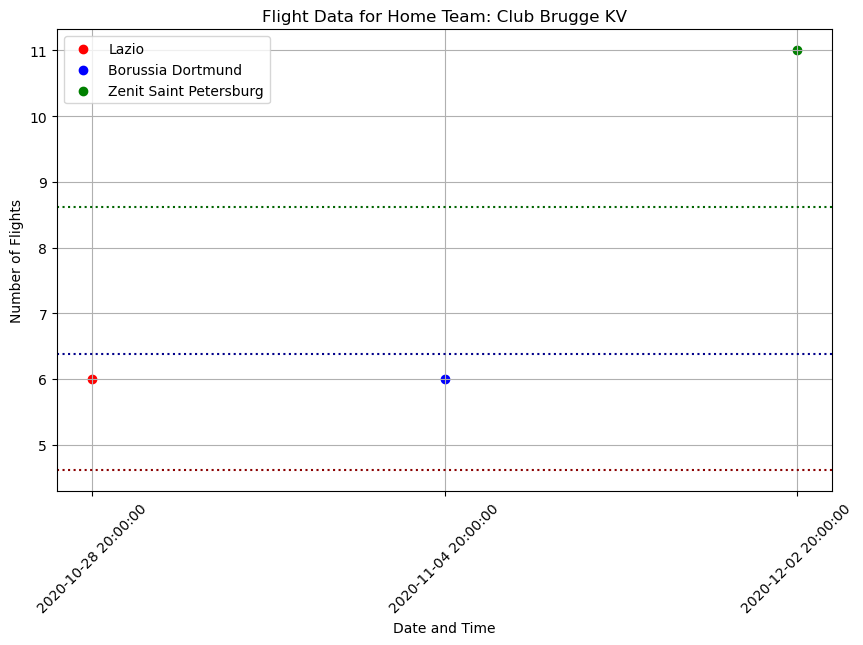

In [66]:
import random
import matplotlib.pyplot as plt

# Randomly select a home_team
selected_home_team = random.choice(final_df['home_team'].unique())

# Filter the DataFrame for the selected home_team
selected_rows = final_df[final_df['home_team'] == selected_home_team]

# Extract the relevant data
date_time = selected_rows['date_time']
number_of_flights = selected_rows['number_of_flights']
away_teams = selected_rows['away_team']
average_flights = selected_rows['Average_flights']

# Define custom colors for points and dotted lines
point_colors = ['red', 'blue', 'green']
line_colors = ['darkred', 'darkblue', 'darkgreen']

# Create the plot
plt.figure(figsize=(10, 6))
for i, away_team in enumerate(away_teams.unique()):
    # Filter data for the current away_team
    team_rows = selected_rows[selected_rows['away_team'] == away_team]

    # Plot number_of_flights as points with different colors for each away_team
    plt.scatter(date_time[team_rows.index], number_of_flights[team_rows.index], c=point_colors[i], label=away_team)

for i, avg_flight in enumerate(average_flights):
    # Plot Average_flights as dotted lines with different colors for each average_flight
    plt.axhline(avg_flight, linestyle='dotted', color=line_colors[i])

# Customize the plot
plt.xlabel('Date and Time')
plt.ylabel('Number of Flights')
plt.title(f'Flight Data for Home Team: {selected_home_team}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig('Graph 1.png')	

# Show the plot
plt.show()


In [ ]:
#Correlating Average flights and number of flights


In [53]:
# Compute the correlation matrix
correlation_matrix = final_df[['Average_flights','number_of_flights']].corr()

print(correlation_matrix)


                   Average_flights  number_of_flights
Average_flights           1.000000           0.930912
number_of_flights         0.930912           1.000000


# Graph2: For a home team's matches on different days, number of flights of Different Airlines are compared

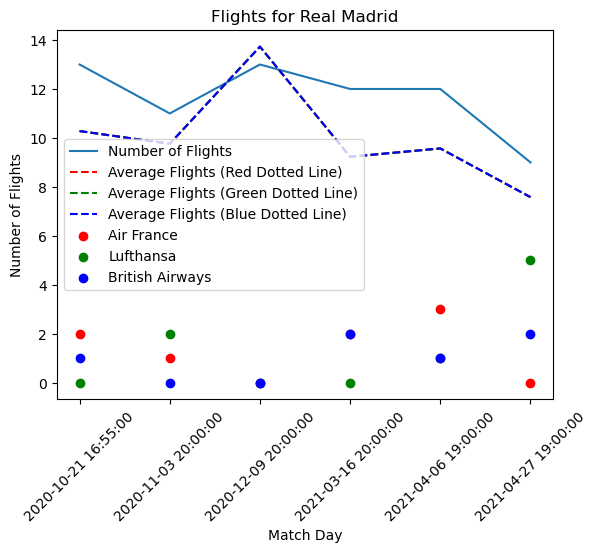

In [69]:
import random
import matplotlib.pyplot as plt

# Randomly choose a home_team
random_home_team = random.choice(df['home_team'].unique())

# Filter the DataFrame for the chosen home_team
filtered_df = final_df[final_df['home_team'] == random_home_team]

# Sort the DataFrame by date_time
filtered_df = filtered_df.sort_values('date_time')

# Create the plot
fig, ax = plt.subplots()

# Plot the number_of_flights as a line
ax.plot(filtered_df['date_time'], filtered_df['number_of_flights'], label='Number of Flights')

# Plot the Average_flights as a dotted line with different colors
ax.plot(filtered_df['date_time'], filtered_df['Average_flights'], 'r--', label='Average Flights (Red Dotted Line)')
ax.plot(filtered_df['date_time'], filtered_df['Average_flights'], 'g--', label='Average Flights (Green Dotted Line)')
ax.plot(filtered_df['date_time'], filtered_df['Average_flights'], 'b--', label='Average Flights (Blue Dotted Line)')

# Plot the values of Air France, Lufthansa, British Airways as dots with corresponding colors
ax.scatter(filtered_df['date_time'], filtered_df['Air France'], c='r', label='Air France')
ax.scatter(filtered_df['date_time'], filtered_df['Lufthansa'], c='g', label='Lufthansa')
ax.scatter(filtered_df['date_time'], filtered_df['British Airways'], c='b', label='British Airways')

# Set the labels and title
ax.set_xlabel('Match Day')
ax.set_ylabel('Number of Flights')
ax.set_title(f'Flights for {random_home_team}')

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.savefig('Graph 2.png')
# Display the plot
plt.show()


# Graph 3: Heat Map

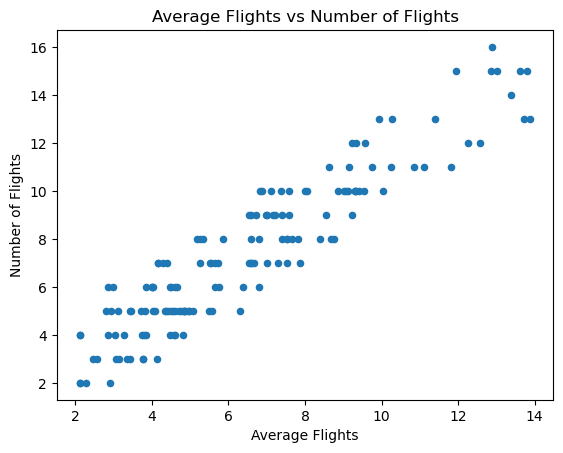

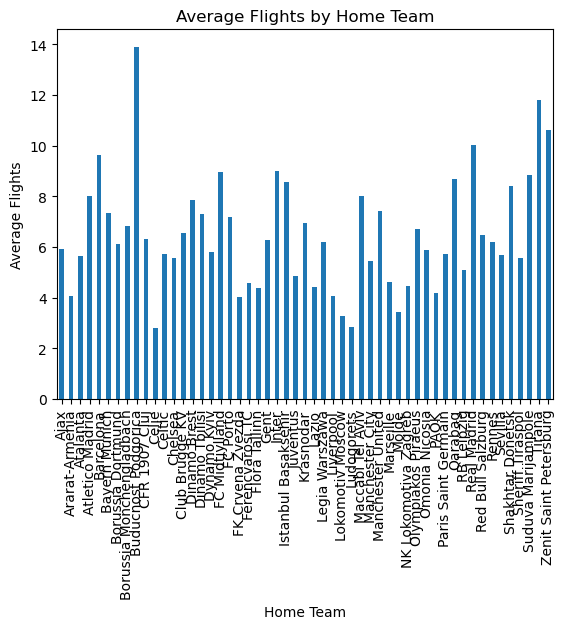

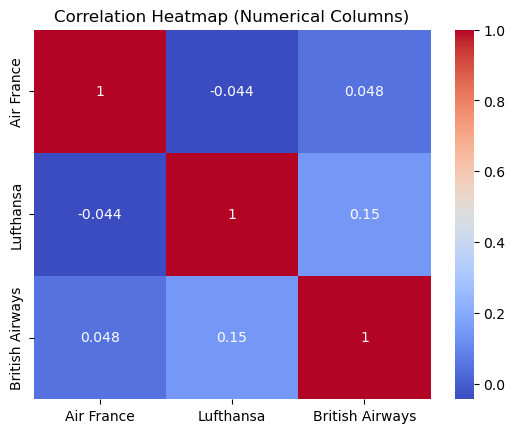

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Average_flights vs number_of_flights
final_df.plot.scatter(x='Average_flights', y='number_of_flights')
plt.xlabel('Average Flights')
plt.ylabel('Number of Flights')
plt.title('Average Flights vs Number of Flights')
plt.savefig('Graph 3.png')
plt.show()

# Bar Plot: Average_flights by home_team
final_df.groupby('home_team')['Average_flights'].mean().plot.bar()
plt.xlabel('Home Team')
plt.ylabel('Average Flights')
plt.title('Average Flights by Home Team')
plt.savefig('Graph 4.png')
plt.show()

# # Box Plot: number_of_flights by home_team
# final_df.boxplot(column='number_of_flights', by='home_team')
# plt.xlabel('Home Team')
# plt.ylabel('Number of Flights')
# plt.title('Number of Flights by Home Team')
# plt.xticks(rotation=45)
# plt.show()

numerical_columns = [ 'Air France', 'Lufthansa', 'British Airways']
correlation_matrix = final_df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Columns)')
plt.savefig('Graph 5.png')
plt.show()



# Map 1: Geographical mapping of the number flights on the specific dates flew between two cities

In [ ]:
# !pip install folium
# !pip install ipywidgets

In [58]:
import ipywidgets as widgets
from IPython.display import display, IFrame
import folium
import webbrowser

# Create a dropdown widget to choose the away team
away_team_dropdown = widgets.Dropdown(
    options=final_df['away_team'].unique(),
    description='Choose your team:',
    disabled=False
)

# Function to handle dropdown value change and update the map
def on_dropdown_change(change):
    away_team = change['new']
    filtered_df = final_df[final_df['away_team'] == away_team]

    # Calculate the center coordinates
    center_lat = filtered_df[['lat_h', 'lat_a']].mean().mean()
    center_lon = filtered_df[['lon_h', 'lon_a']].mean().mean()

    # Create the map
    map_widget = folium.Map(location=[center_lat, center_lon], zoom_start=4)

    # Add markers for home and away airports
    for _, row in filtered_df.iterrows():
        home_marker = folium.Marker(location=(row['lat_h'], row['lon_h']), draggable=False, tooltip=row['airport_city_h'], icon=folium.Icon(color='yellow'))
        away_marker = folium.Marker(location=(row['lat_a'], row['lon_a']), draggable=False, tooltip=row['airport_city_a'], icon=folium.Icon(color='green'))
        home_marker.add_to(map_widget)
        away_marker.add_to(map_widget)

        # Draw line between home and away markers
        line = folium.PolyLine(locations=[(row['lat_h'], row['lon_h']), (row['lat_a'], row['lon_a'])], color='blue',
                              tooltip=f"Flights: {row['number_of_flights']}, Date: {row['date_time']}")
        line.add_to(map_widget)

    # Save the map as an HTML file
    map_file = f"map_{away_team}.html"
    map_widget.save(map_file)
    print(f"Map saved as {map_file}")

    # Open the HTML file in a new window
    webbrowser.open_new_tab(map_file)

# Register the dropdown widget's value change event
away_team_dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(away_team_dropdown)


Dropdown(description='Choose your team:', options=('Linfield', 'FC Astana', 'KR Reykjavik', 'Europa', 'Omonia …

C:\Users\krish\AppData\Local\Temp\ipykernel_30984\3173077642.py:27: UserWarning: color argument of Icon should be one of: {'beige', 'white', 'green', 'orange', 'purple', 'darkblue', 'gray', 'lightgreen', 'black', 'darkred', 'lightgray', 'blue', 'cadetblue', 'red', 'pink', 'darkpurple', 'lightred', 'darkgreen', 'lightblue'}.
  home_marker = folium.Marker(location=(row['lat_h'], row['lon_h']), draggable=False, tooltip=row['airport_city_h'], icon=folium.Icon(color='yellow'))


Map saved as map_Fola Esch.html


# Map 2: A consolidated geographical map that displays match locations, number of matches held, flight routes between the match locations

In [59]:
import folium
from folium import plugins

# Create a map centered on Europe
m = folium.Map(location=[50, 10], zoom_start=4)

# Create a feature group for airports
airports_fg = folium.FeatureGroup(name='Airports')

# Add airport markers to the feature group
for index, row in final_df.iterrows():
    # Airport departure location
    departure_lat = row['lat_h']
    departure_lon = row['lon_h']
    departure_iata = row['iata_h']
    
    # Airport arrival location
    arrival_lat = row['lat_a']
    arrival_lon = row['lon_a']
    arrival_iata = row['iata_a']
    
    # Create markers for departure and arrival airports
    departure_marker = folium.Marker(location=[departure_lat, departure_lon], popup=departure_iata)
    arrival_marker = folium.Marker(location=[arrival_lat, arrival_lon], popup=arrival_iata)
    
    # Add markers to the feature group
    airports_fg.add_child(departure_marker)
    airports_fg.add_child(arrival_marker)

# Add the airports feature group to the map
m.add_child(airports_fg)

# Create a feature group for flights
flights_fg = folium.FeatureGroup(name='Flights')

# Add flight lines to the feature group
for index, row in final_df.iterrows():
    # Airport departure location
    departure_lat = row['lat_h']
    departure_lon = row['lon_h']
    
    # Airport arrival location
    arrival_lat = row['lat_a']
    arrival_lon = row['lon_a']
    
    # Number of flights between airports
    num_flights = row['number_of_flights']
    
    # Create a line between departure and arrival airports
    line = folium.PolyLine(locations=[(departure_lat, departure_lon), (arrival_lat, arrival_lon)], 
                           color='blue', weight=num_flights/10)
    
    # Add line to the feature group
    flights_fg.add_child(line)

# Add the flights feature group to the map
m.add_child(flights_fg)

# Create a feature group for match cities
cities_fg = folium.FeatureGroup(name='Match Cities')

# Add match cities as circle markers with varying color intensity based on the number of matches
for city, count in final_df['city'].value_counts().iteritems():
    # Get the latitude and longitude of the city
    city_lat = final_df[final_df['city'] == city].iloc[0]['lat_h']
    city_lon = final_df[final_df['city'] == city].iloc[0]['lon_h']
    
    # Create a circle marker with color intensity based on the number of matches
    circle_marker = folium.CircleMarker(location=[city_lat, city_lon], radius=10, 
                                        popup=f'{city}: {count} matches', fill=True, 
                                        fill_color='red', fill_opacity=count/10, color='black')
    
    # Add circle marker to the feature group
    cities_fg.add_child(circle_marker)

# Add the match cities feature group to the map
m.add_child(cities_fg)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('map_soccer_matches_airline_routes.html')

